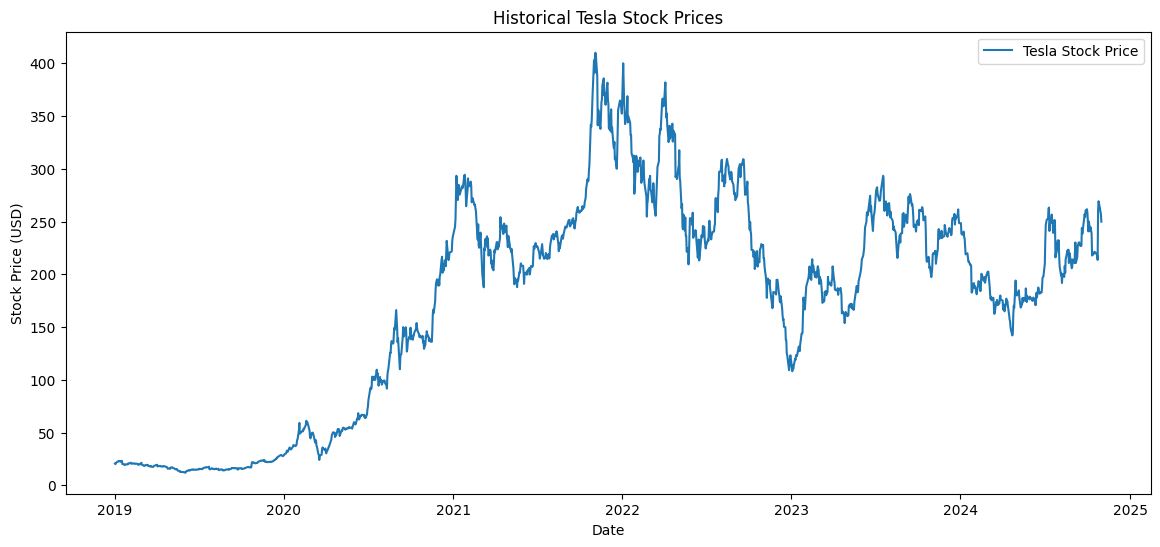

Mean Stock Price: 175.62
Variance of Stock Price: 10306.83


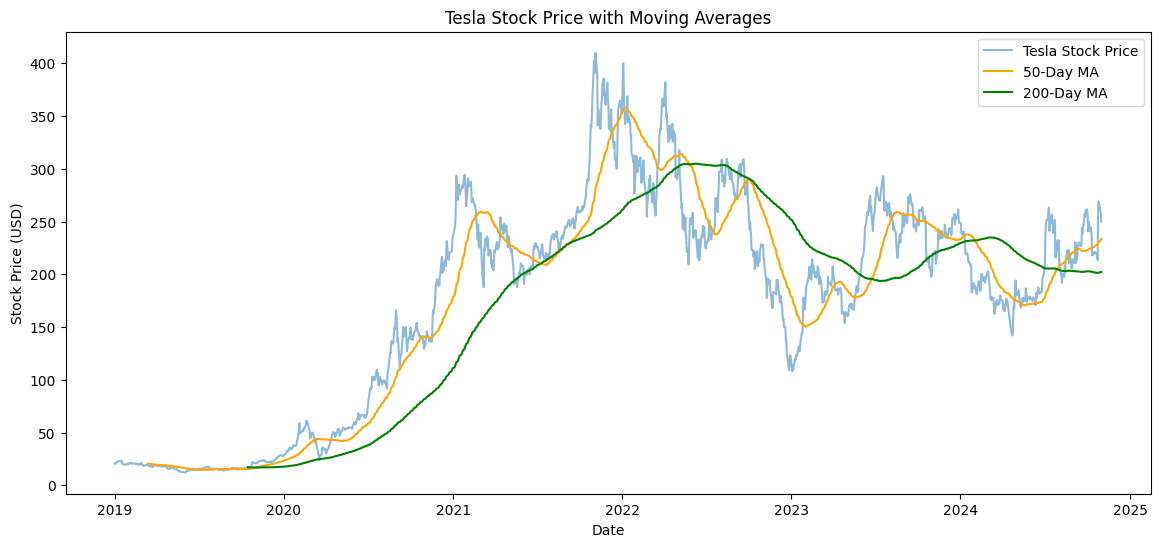


Correlation Matrix:
                 Close  Close_ixic  Close_sp500
Close        1.000000    0.779768     0.738614
Close_ixic   0.779768    1.000000     0.971028
Close_sp500  0.738614    0.971028     1.000000


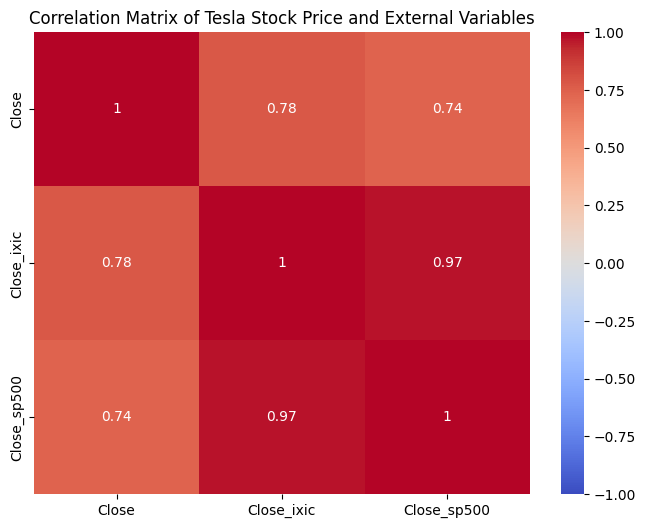

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
# Replace 'file_path' with the path or DataFrame variables for your datasets
tesla_close = pd.read_csv('Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
ixic = pd.read_csv('IXIC_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
sp500 = pd.read_csv('S&P500_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on 'Date' with suffixes to avoid conflicts
merged_data = tesla_close.merge(ixic, left_index=True, right_index=True, how='inner', suffixes=('', '_ixic'))
merged_data = merged_data.merge(sp500, left_index=True, right_index=True, how='inner', suffixes=('', '_sp500'))

# Step 2: Plot Tesla stock prices
plt.figure(figsize=(14, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Tesla Stock Price')
plt.title('Historical Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Step 3: Calculate key statistics
mean_price = merged_data['Close'].mean()
variance_price = merged_data['Close'].var()
print(f"Mean Stock Price: {mean_price:.2f}")
print(f"Variance of Stock Price: {variance_price:.2f}")

# Calculate moving averages
merged_data['50_MA'] = merged_data['Close'].rolling(window=50).mean()
merged_data['200_MA'] = merged_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Tesla Stock Price', alpha=0.5)
plt.plot(merged_data.index, merged_data['50_MA'], label='50-Day MA', color='orange')
plt.plot(merged_data.index, merged_data['200_MA'], label='200-Day MA', color='green')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Step 4: Check for correlations
correlation_matrix = merged_data[['Close', 'Close_ixic', 'Close_sp500']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Tesla Stock Price and External Variables')
plt.show()
